In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel('CollectedData.xlsx', sheet_name = "Sheet2", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,8.0,1.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.0,11.70
1,8.0,2.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
2,8.0,3.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.5,8.1,11.80
3,8.0,4.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
4,8.0,5.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75


In [3]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
           dtype='int64')

In [4]:
df = df.iloc[:, [2, 7, 18, 21, 25, 26, 36, 37, 39, 41, 42, 43, 48, 73, 76]]
df.rename(columns = {2 : 'Age', 7 : 'AMV', 18 : 'Met', 21 : 'Clo', 25 : 'Dewpt', 26 : 'PlaneRadTemp', 36 : 'Ta', 37 : 'Tmrt',
39 : 'Vel', 41 :'AirTurb', 42 : 'Pa', 43 : 'Rh', 48: 'PMV', 73 : 'TaOutdoor',  76 : 'RhOutdoor'}, inplace = True)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Age,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
0,NaN,2.0,2.1,0.65,NaN,NaN,19.1,19.629472,0.06,NaN,NaN,51.25,0.34,11.55,79.0
1,NaN,2.0,2.1,0.78,NaN,NaN,19.1,19.629472,0.06,NaN,NaN,51.30,0.51,11.55,79.0
2,NaN,1.0,2.1,1.05,NaN,NaN,20.0,19.046655,0.06,NaN,NaN,51.90,0.80,11.55,79.0
3,NaN,3.0,2.6,0.40,NaN,NaN,21.0,20.153116,0.06,NaN,NaN,49.90,0.76,11.55,79.0
4,NaN,3.0,3.0,0.37,NaN,NaN,23.0,21.942458,0.06,NaN,NaN,45.60,1.47,11.55,79.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12566 entries, 0 to 12565
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           9650 non-null   float64
 1   AMV           12511 non-null  float64
 2   Met           10679 non-null  float64
 3   Clo           11160 non-null  float64
 4   Dewpt         9014 non-null   float64
 5   PlaneRadTemp  5544 non-null   float64
 6   Ta            12546 non-null  float64
 7   Tmrt          8865 non-null   float64
 8   Vel           8866 non-null   float64
 9   AirTurb       6965 non-null   float64
 10  Pa            7910 non-null   float64
 11  Rh            12531 non-null  float64
 12  PMV           11870 non-null  float64
 13  TaOutdoor     11198 non-null  float64
 14  RhOutdoor     12547 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB


In [6]:
df.isna().sum()

Age             2916
AMV               55
Met             1887
Clo             1406
Dewpt           3552
PlaneRadTemp    7022
Ta                20
Tmrt            3701
Vel             3700
AirTurb         5601
Pa              4656
Rh                35
PMV              696
TaOutdoor       1368
RhOutdoor         19
dtype: int64

In [7]:
df.describe()

,Age,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
count,9650.000000,12511.000000,10679.000000,11160.000000,9014.000000,5544.000000,12546.000000,8865.000000,8866.000000,6965.000000,7910.000000,12531.000000,11870.000000,11198.000000,12547.000000
mean,308.637202,0.100735,1.066003,0.778492,13.621447,0.217785,23.178861,23.450261,0.112439,18.265870,5.123996,42.529203,-0.073676,17.174585,61.100365
std,680.115105,1.102099,0.428978,0.221992,5.903044,1.041164,1.433390,1.502953,0.079041,25.041109,8.156136,15.061075,0.538016,10.665071,24.703896
min,0.000000,-3.000000,0.100000,0.150000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.000000,7.400000,-4.170000,-24.900000,0.000000
25%,26.000000,-0.700000,1.000000,0.630000,9.600000,-0.230000,22.300000,22.588684,0.068000,0.320000,1.226667,29.300000,-0.400000,11.350000,53.769937
50%,35.000000,0.000000,1.100000,0.751700,14.100000,0.200000,23.136667,23.358438,0.100000,0.500000,1.550667,43.280000,-0.030000,18.200000,68.795799
75%,45.000000,1.000000,1.241468,0.880000,17.337500,0.600000,23.900000,24.250000,0.140000,38.815000,1.985333,55.500125,0.260000,26.600000,76.950000
max,1996.000000,3.000000,4.500000,2.130000,26.896750,11.700000,31.000000,37.445000,1.880000,102.450000,27.700000,79.300000,2.500000,32.350000,100.350000


In [8]:
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    i_q_r = q3 - q1
    outliers = df[(df< (q1 - 1.5 * i_q_r)) | (df > (q3 + 1.5 * i_q_r))]
    return outliers

In [9]:
print('Number of outliers in Age column: {}'.format(len(outliers(df['Age']))))
print('Number of outliers in AMV column: {}'.format(len(outliers(df['AMV']))))
print('Number of outliers in Met column: {}'.format(len(outliers(df['Met']))))
print('Number of outliers in Clo column: {}'.format(len(outliers(df['Clo']))))
print('Number of outliers in Dewpt column: {}'.format(len(outliers(df['Dewpt']))))
print('Number of outliers in PlaneRadTemp column: {}'.format(len(outliers(df['PlaneRadTemp']))))
print('Number of outliers in Ta column: {}'.format(len(outliers(df['Ta']))))
print('Number of outliers in Tmrt column: {}'.format(len(outliers(df['Tmrt']))))
print('Number of outliers in Vel column: {}'.format(len(outliers(df['Vel']))))
print('Number of outliers in AirTurb column: {}'.format(len(outliers(df['AirTurb']))))
print('Number of outliers in Pa column: {}'.format(len(outliers(df['Pa']))))
print('Number of outliers in Rh column: {}'.format(len(outliers(df['Rh']))))
print('Number of outliers in PMV column: {}'.format(len(outliers(df['PMV']))))
print('Number of outliers in TaOutdoor column: {}'.format(len(outliers(df['TaOutdoor']))))
print('Number of outliers in RhOutdoor column: {}'.format(len(outliers(df['RhOutdoor']))))

Number of outliers in Age column: 1359
Number of outliers in AMV column: 0
Number of outliers in Met column: 1732
Number of outliers in Clo column: 373
Number of outliers in Dewpt column: 0
Number of outliers in PlaneRadTemp column: 452
Number of outliers in Ta column: 540
Number of outliers in Tmrt column: 344
Number of outliers in Vel column: 309
Number of outliers in AirTurb column: 2
Number of outliers in Pa column: 1352
Number of outliers in Rh column: 0
Number of outliers in PMV column: 259
Number of outliers in TaOutdoor column: 124
Number of outliers in RhOutdoor column: 1349


In [10]:
print('Mode of Age Column: {}'.format(df['Age'].mode()))
print('Mode of AMV Column: {}'.format(df['AMV'].mode()))
print('Mode of Met Column: {}'.format(df['Met'].mode()))
print('Mode of Clo Column: {}'.format((df['Clo']).mode()))
print('Mode of Dewpt Column: {}'.format(df['Dewpt'].mode()))
print('Mode of PlaneRadTemp Column: {}'.format(df['PlaneRadTemp'].mode()))
print('Mode of Ta Column: {}'.format(df['Ta'].mode()))
print('Mode of Tmrt Column: {}'.format(df['Tmrt'].mode()))
print('Mode of Vel Column: {}'.format(df['Vel'].mode()))
print('Mode of AirTurb Column: {}'.format(df['AirTurb'].mode()))
print('Mode of Pa Column: {}'.format(df['Pa'].mode()))
print('Mode of Rh Column: {}'.format(df['Rh'].mode()))
print('Mode of PMV Column: {}'.format(df['PMV'].mode()))
print('Mode of TaOutdoor Column: {}'.format(df['TaOutdoor'].mode()))
print('Mode of RhOutdoor Column: {}'.format(df['RhOutdoor'].mode()))

Mode of Age Column: 0    24.0
dtype: float64
Mode of AMV Column: 0    0.0
dtype: float64
Mode of Met Column: 0    1.0
dtype: float64
Mode of Clo Column: 0    0.77
dtype: float64
Mode of Dewpt Column: 0    17.4
dtype: float64
Mode of PlaneRadTemp Column: 0    0.3
dtype: float64
Mode of Ta Column: 0    23.2
dtype: float64
Mode of Tmrt Column: 0    22.5
dtype: float64
Mode of Vel Column: 0    0.1
dtype: float64
Mode of AirTurb Column: 0    0.5
dtype: float64
Mode of Pa Column: 0    2.1
dtype: float64
Mode of Rh Column: 0    64.0
dtype: float64
Mode of PMV Column: 0    0.1
dtype: float64
Mode of TaOutdoor Column: 0    27.555556
dtype: float64
Mode of RhOutdoor Column: 0    0.0
dtype: float64


In [11]:
print('Median of Age Column: {}'.format(df['Age'].median()))
print('Median of AMV Column: {}'.format(df['AMV'].median()))
print('Median of Met Column: {}'.format(df['Met'].median()))
print('Median of Clo Column: {}'.format(df['Clo'].median()))
print('Median of Dewpt Column: {}'.format(df['Dewpt'].median()))
print('Median of PlaneRadTemp Column: {}'.format(df['PlaneRadTemp'].median()))
print('Median of Ta Column: {}'.format(df['Ta'].median()))
print('Median of Tmrt Column: {}'.format(df['Tmrt'].median()))
print('Median of Vel Column: {}'.format(df['Vel'].median()))
print('Median of AirTurb Column: {}'.format(df['AirTurb'].median()))
print('Median of Pa Column: {}'.format(df['Pa'].median()))
print('Median of Rh Column: {}'.format(df['Rh'].median()))
print('Median of PMV Column: {}'.format(df['PMV'].median()))
print('Median of TaOutdoor Column: {}'.format(df['TaOutdoor'].median()))
print('Median of RhOutdoor Column: {}'.format(df['RhOutdoor'].median()))

Median of Age Column: 35.0
Median of AMV Column: 0.0
Median of Met Column: 1.1
Median of Clo Column: 0.7517000000000001
Median of Dewpt Column: 14.1
Median of PlaneRadTemp Column: 0.2
Median of Ta Column: 23.136666666666667
Median of Tmrt Column: 23.35843831064267
Median of Vel Column: 0.1
Median of AirTurb Column: 0.5
Median of Pa Column: 1.5506666666666669
Median of Rh Column: 43.28
Median of PMV Column: -0.03
Median of TaOutdoor Column: 18.2
Median of RhOutdoor Column: 68.79579929928357


In [12]:
print('Variance of Age Column: {}'.format(df['Age'].var()))
print('Variance of AMV Column: {}'.format(df['AMV'].var()))
print('Variance of Met Column: {}'.format(df['Met'].var()))
print('Variance of Clo Column: {}'.format(df['Clo'].var()))
print('Variance of Dewpt Column: {}'.format(df['Dewpt'].var()))
print('Variance of PlaneRadTemp Column: {}'.format(df['PlaneRadTemp'].var()))
print('Variance of Ta Column: {}'.format(df['Ta'].var()))
print('Variance of Tmrt Column: {}'.format(df['Tmrt'].var()))
print('Variance of Vel Column: {}'.format(df['Vel'].var()))
print('Variance of AirTurb Column: {}'.format(df['AirTurb'].var()))
print('Variance of Pa Column: {}'.format(df['Pa'].var()))
print('Variance of Rh Column: {}'.format(df['Rh'].var()))
print('Variance of PMV Column: {}'.format(df['PMV'].var()))
print('Variance of TaOutdoor Column: {}'.format(df['TaOutdoor'].var()))
print('Variance of RhOutdoor Column: {}'.format(df['RhOutdoor'].var()))

Variance of Age Column: 462556.5561036848
Variance of AMV Column: 1.2146213616909207
Variance of Met Column: 0.18402232604734822
Variance of Clo Column: 0.0492806224675491
Variance of Dewpt Column: 34.84592820166478
Variance of PlaneRadTemp Column: 1.084022292053157
Variance of Ta Column: 2.054606108290929
Variance of Tmrt Column: 2.258867075649112
Variance of Vel Column: 0.006247504531293009
Variance of AirTurb Column: 627.0571287191875
Variance of Pa Column: 66.52256237009294
Variance of Rh Column: 226.83598293781705
Variance of PMV Column: 0.2894613304628603
Variance of TaOutdoor Column: 113.7437332797836
Variance of RhOutdoor Column: 610.2824769615157


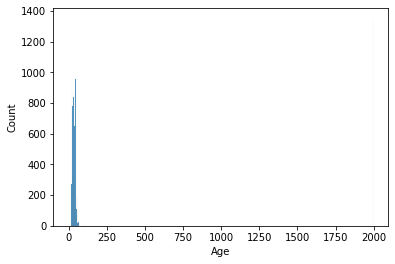

In [13]:
sns.histplot(df['Age'])

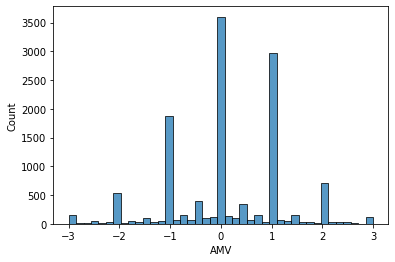

In [14]:
sns.histplot(df['AMV'])

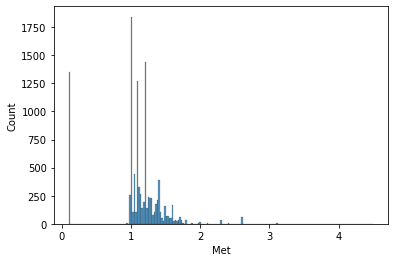

In [15]:
sns.histplot(df['Met'])

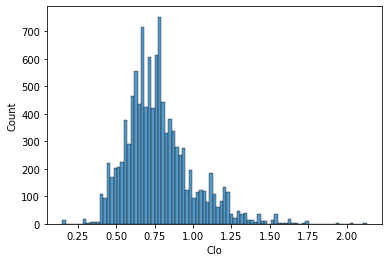

In [16]:
sns.histplot(df['Clo'])

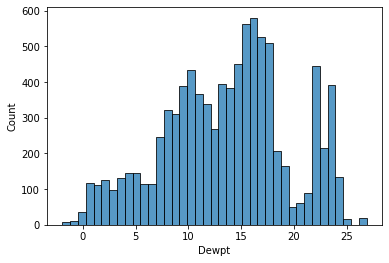

In [17]:
sns.histplot(df['Dewpt'])

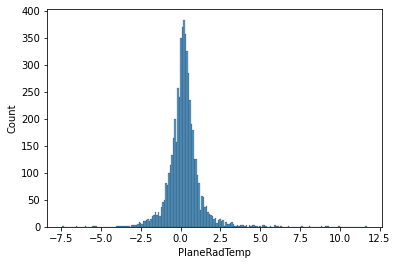

In [18]:
sns.histplot(df['PlaneRadTemp'])

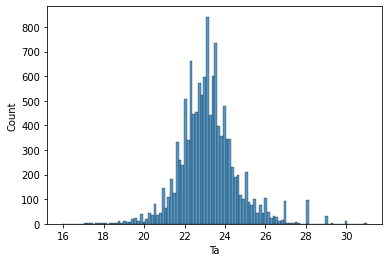

In [19]:
sns.histplot(df['Ta'])

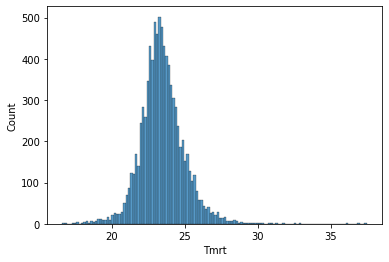

In [20]:
sns.histplot(df['Tmrt'])

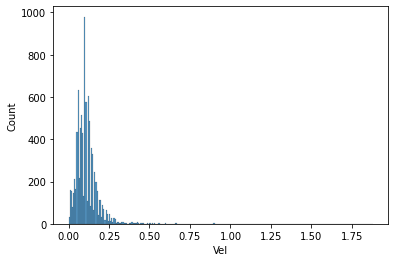

In [21]:
sns.histplot(df['Vel'])

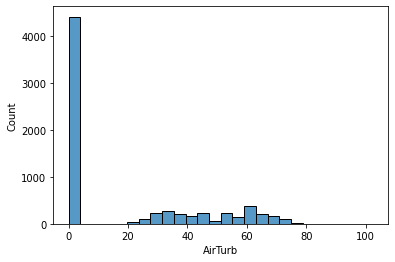

In [22]:
sns.histplot(df['AirTurb'])

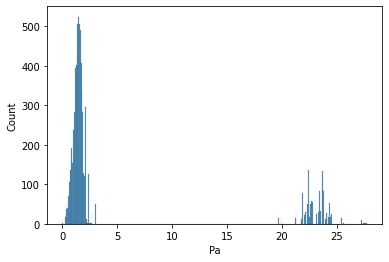

In [23]:
sns.histplot(df['Pa'])

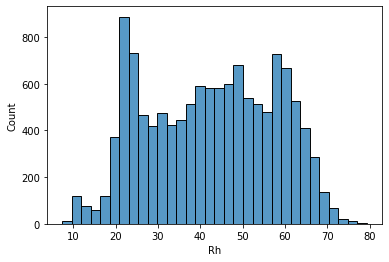

In [24]:
sns.histplot(df['Rh'])

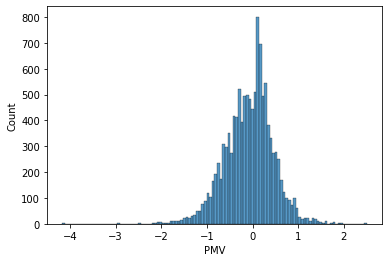

In [25]:
sns.histplot(df['PMV'])

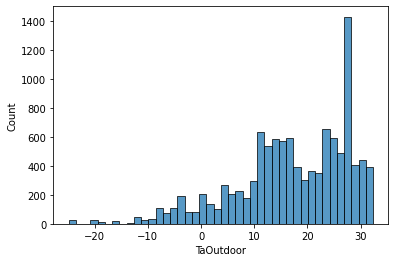

In [26]:
sns.histplot(df['TaOutdoor'])

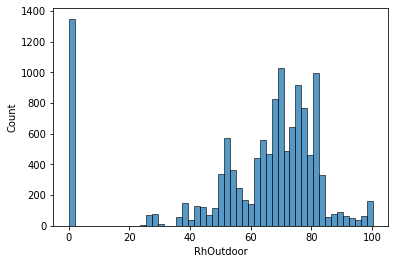

In [27]:
sns.histplot(df['RhOutdoor'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


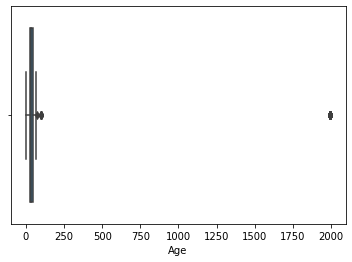

In [28]:
sns.boxplot(df['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


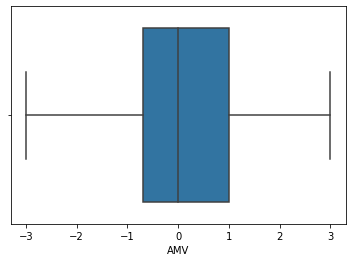

In [29]:
sns.boxplot(df['AMV'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


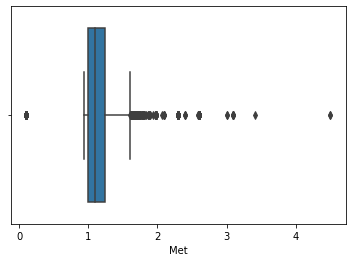

In [30]:
sns.boxplot(df['Met'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


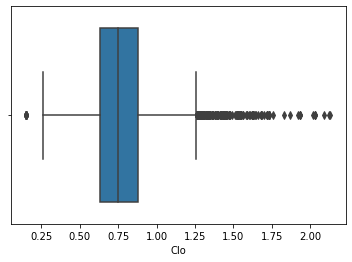

In [31]:
sns.boxplot(df['Clo'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


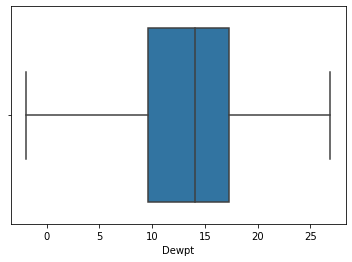

In [32]:
sns.boxplot(df['Dewpt'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


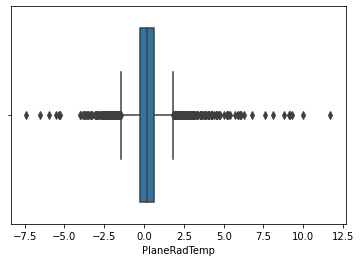

In [33]:
sns.boxplot(df['PlaneRadTemp'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


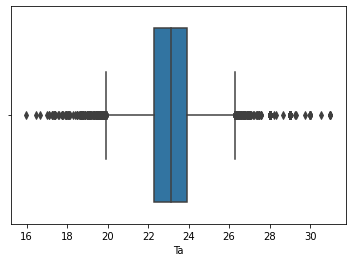

In [34]:
sns.boxplot(df['Ta'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


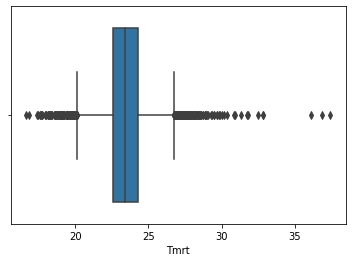

In [35]:
sns.boxplot(df['Tmrt'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


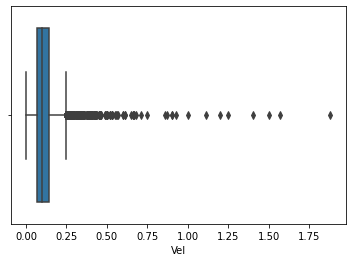

In [36]:
sns.boxplot(df['Vel'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


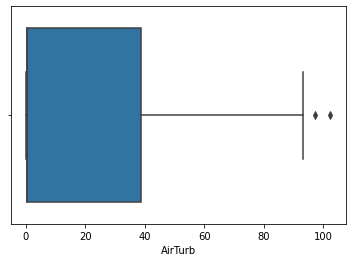

In [37]:
sns.boxplot(df['AirTurb'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


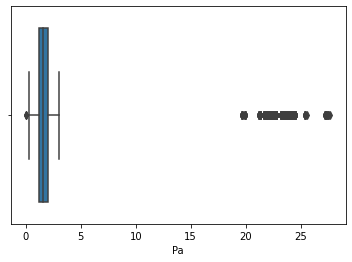

In [38]:
sns.boxplot(df['Pa'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


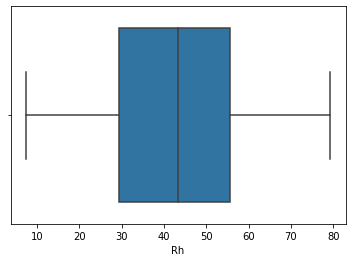

In [39]:
sns.boxplot(df['Rh'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


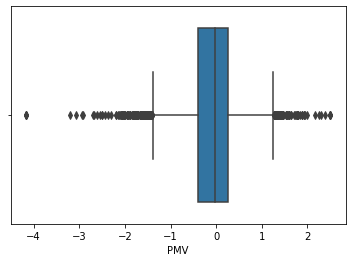

In [40]:
sns.boxplot(df['PMV'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


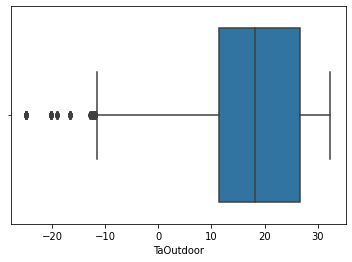

In [41]:
sns.boxplot(df['TaOutdoor'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


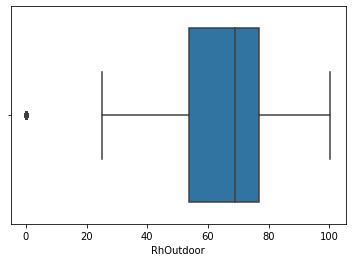

In [42]:
sns.boxplot(df['RhOutdoor'])

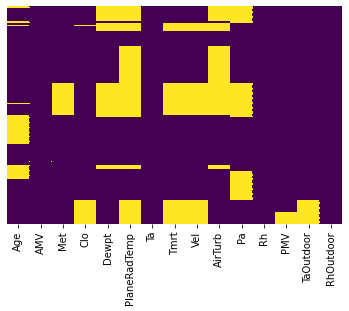

In [43]:
sns.heatmap(df.isna(), yticklabels = False, cbar = False,  cmap = 'viridis')

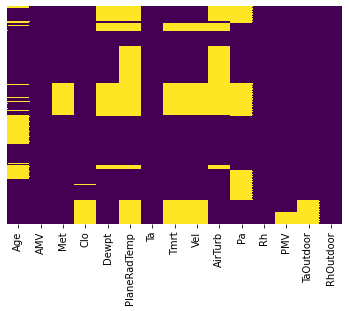

In [44]:
df = df.dropna(subset = ['AMV', 'Ta', 'Rh', 'RhOutdoor'])
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,  cmap = 'viridis')

In [45]:
age_m = df['Age'].median()
df['Age'].fillna(age_m, inplace = True)

met_m = df['Met'].median()
df['Met'].fillna(met_m, inplace = True)

clo_m = df['Clo'].median()
df['Clo'].fillna(clo_m, inplace = True)

dewpt_m = df['Dewpt'].median()
df['Dewpt'].fillna(dewpt_m, inplace = True)

planeradtemp_m = df['PlaneRadTemp'].median()
df['PlaneRadTemp'].fillna(planeradtemp_m, inplace = True)

tmrt_m = df['Tmrt'].median()
df['Tmrt'].fillna(tmrt_m, inplace = True)

vel_m = df['Vel'].median()
df['Vel'].fillna(vel_m, inplace = True)

airturb_m = df['AirTurb'].median()
df['AirTurb'].fillna(airturb_m, inplace = True)

pa_m = df['Pa'].median()
df['Pa'].fillna(pa_m, inplace = True)

pmv_m = df['PMV'].median()
df['PMV'].fillna(pmv_m, inplace = True)

taoutdoor_m = df['TaOutdoor'].median()
df['TaOutdoor'].fillna(taoutdoor_m, inplace = True)

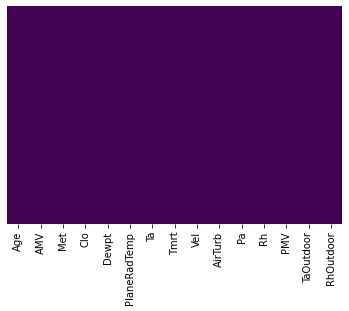

In [46]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,  cmap = 'viridis')

In [47]:
print('Number of outliers in Age column: {}'.format(len(outliers(df['Age']))))
print('Number of outliers in AMV column: {}'.format(len(outliers(df['AMV']))))
print('Number of outliers in Met column: {}'.format(len(outliers(df['Met']))))
print('Number of outliers in Clo column: {}'.format(len(outliers(df['Clo']))))
print('Number of outliers in Dewpt column: {}'.format(len(outliers(df['Dewpt']))))
print('Number of outliers in PlaneRadTemp column: {}'.format(len(outliers(df['PlaneRadTemp']))))
print('Number of outliers in Ta column: {}'.format(len(outliers(df['Ta']))))
print('Number of outliers in Tmrt column: {}'.format(len(outliers(df['Tmrt']))))
print('Number of outliers in Vel column: {}'.format(len(outliers(df['Vel']))))
print('Number of outliers in AirTurb column: {}'.format(len(outliers(df['AirTurb']))))
print('Number of outliers in Pa column: {}'.format(len(outliers(df['Pa']))))
print('Number of outliers in Rh column: {}'.format(len(outliers(df['Rh']))))
print('Number of outliers in PMV column: {}'.format(len(outliers(df['PMV']))))
print('Number of outliers in TaOutdoor column: {}'.format(len(outliers(df['TaOutdoor']))))
print('Number of outliers in RhOutdoor column: {}'.format(len(outliers(df['RhOutdoor']))))

Number of outliers in Age column: 1379
Number of outliers in AMV column: 0
Number of outliers in Met column: 2121
Number of outliers in Clo column: 774
Number of outliers in Dewpt column: 760
Number of outliers in PlaneRadTemp column: 5420
Number of outliers in Ta column: 540
Number of outliers in Tmrt column: 1589
Number of outliers in Vel column: 1257
Number of outliers in AirTurb column: 2888
Number of outliers in Pa column: 3106
Number of outliers in Rh column: 0
Number of outliers in PMV column: 320
Number of outliers in TaOutdoor column: 221
Number of outliers in RhOutdoor column: 1349


In [48]:
for i in outliers(df['Age']):
    df['Age'] = np.where(df['Age'] == i, df['Age'].median(), df['Age'])

for i in outliers(df['Met']):
    df['Met'] = np.where(df['Met'] == i, df['Met'].median(), df['Met'])

for i in outliers(df['Clo']):
    df['Clo'] = np.where(df['Clo'] == i, df['Clo'].median(), df['Clo'])

for i in outliers(df['Dewpt']):
    df['Dewpt'] = np.where(df['Dewpt'] == i, df['Dewpt'].median(), df['Dewpt'])

for i in outliers(df['PlaneRadTemp']):
    df['PlaneRadTemp'] = np.where(df['PlaneRadTemp'] == i, df['PlaneRadTemp'].median(), df['PlaneRadTemp'])

for i in outliers(df['Ta']):
    df['Ta'] = np.where(df['Ta'] == i, df['Ta'].median(), df['Ta'])

for i in outliers(df['Tmrt']):
    df['Tmrt'] = np.where(df['Tmrt'] == i, df['Tmrt'].median(), df['Tmrt'])

for i in outliers(df['Vel']):
    df['Vel'] = np.where(df['Vel'] == i, df['Vel'].median(), df['Vel'])

for i in outliers(df['AirTurb']):
    df['AirTurb'] = np.where(df['AirTurb'] == i, df['AirTurb'].median(), df['AirTurb'])

for i in outliers(df['Pa']):
    df['Pa'] = np.where(df['Pa'] == i, df['Pa'].median(), df['Pa'])

for i in outliers(df['PMV']):
    df['PMV'] = np.where(df['PMV'] == i, df['PMV'].median(), df['PMV'])

for i in outliers(df['TaOutdoor']):
    df['TaOutdoor'] = np.where(df['TaOutdoor'] == i, df['TaOutdoor'].median(), df['TaOutdoor'])

for i in outliers(df['RhOutdoor']):
    df['RhOutdoor'] = np.where(df['RhOutdoor'] == i, df['RhOutdoor'].median(), df['RhOutdoor'])

In [49]:
print('Variance of Age Column: {}'.format(df['Age'].var()))
print('Variance of AMV Column: {}'.format(df['AMV'].var()))
print('Variance of Met Column: {}'.format(df['Met'].var()))
print('Variance of Clo Column: {}'.format(df['Clo'].var()))
print('Variance of Dewpt Column: {}'.format(df['Dewpt'].var()))
print('Variance of PlaneRadTemp Column: {}'.format(df['PlaneRadTemp'].var()))
print('Variance of Ta Column: {}'.format(df['Ta'].var()))
print('Variance of Tmrt Column: {}'.format(df['Tmrt'].var()))
print('Variance of Vel Column: {}'.format(df['Vel'].var()))
print('Variance of AirTurb Column: {}'.format(df['AirTurb'].var()))
print('Variance of Pa Column: {}'.format(df['Pa'].var()))
print('Variance of Rh Column: {}'.format(df['Rh'].var()))
print('Variance of PMV Column: {}'.format(df['PMV'].var()))
print('Variance of TaOutdoor Column: {}'.format(df['TaOutdoor'].var()))
print('Variance of RhOutdoor Column: {}'.format(df['RhOutdoor'].var()))

Variance of Age Column: 65.93598231491355
Variance of AMV Column: 1.2151465159093104
Variance of Met Column: 0.013099089104374087
Variance of Clo Column: 0.02312818093230221
Variance of Dewpt Column: 16.622583889751567
Variance of PlaneRadTemp Column: 0.0
Variance of Ta Column: 1.2258147714715197
Variance of Tmrt Column: 0.4533299042086383
Variance of Vel Column: 0.0008550190908699744
Variance of AirTurb Column: 0.011769552940005253
Variance of Pa Column: 0.022268220911113957
Variance of Rh Column: 226.81609674896015
Variance of PMV Column: 0.20181632054569099
Variance of TaOutdoor Column: 83.21330148569653
Variance of RhOutdoor Column: 160.4666756270605


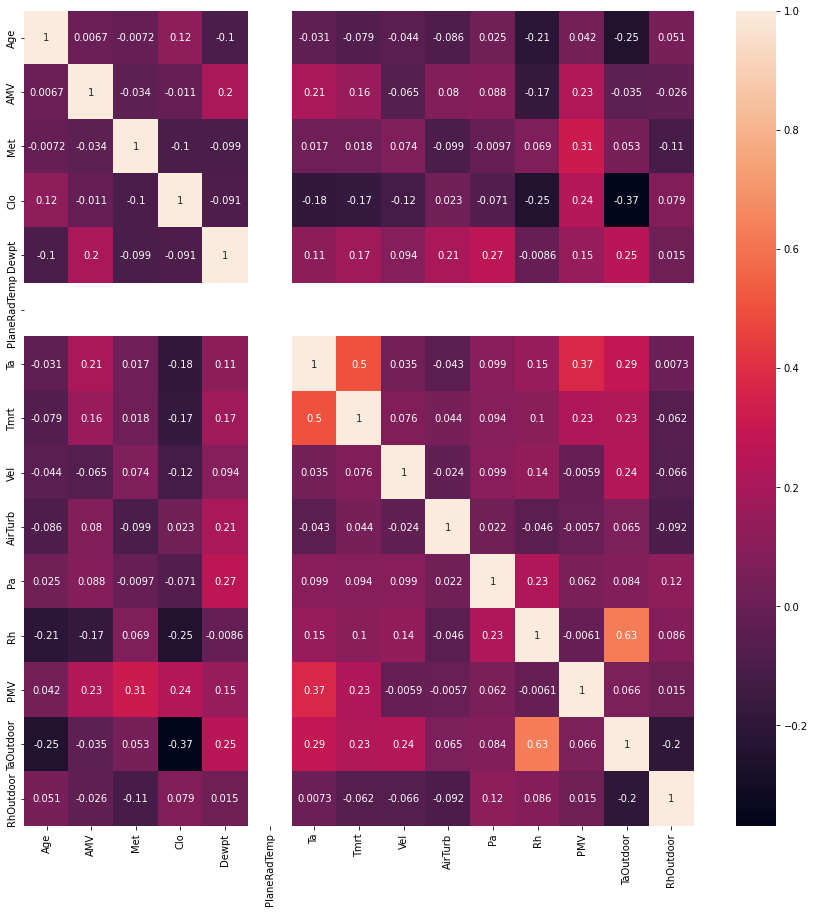

In [50]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True)

In [51]:
df = df.drop(labels = ['Ta', 'TaOutdoor'], axis = 1)

In [52]:
def calculate_entropy(df):
    prob = df.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(prob) * prob)
    return round(entropy, 3)

In [53]:
print('Entropy of Age Column: {}'.format(calculate_entropy(df['Age'])))
print('Entropy of Met Column: {}'.format(calculate_entropy(df['Met'])))
print('Entropy of Clo Column: {}'.format(calculate_entropy(df['Clo'])))
print('Entropy of Dewpt Column: {}'.format(calculate_entropy(df['Dewpt'])))
print('Entropy of PlaneRadTemp Column: {}'.format(calculate_entropy(df['PlaneRadTemp'])))
print('Entropy of Tmrt Column: {}'.format(calculate_entropy(df['Tmrt'])))
print('Entropy of Vel Column: {}'.format(calculate_entropy(df['Vel'])))
print('Entropy of AirTurb Column: {}'.format(calculate_entropy(df['AirTurb'])))
print('Entropy of Pa Column: {}'.format(calculate_entropy(df['Pa'])))
print('Entropy of Rh Column: {}'.format(calculate_entropy(df['Rh'])))
print('Entropy of PMV Column: {}'.format(calculate_entropy(df['PMV'])))
print('Entropy of RhOutdoor Column: {}'.format(calculate_entropy(df['RhOutdoor'])))

Entropy of Age Column: 3.815
Entropy of Met Column: 4.115
Entropy of Clo Column: 6.913
Entropy of Dewpt Column: 7.202
Entropy of PlaneRadTemp Column: -0.0
Entropy of Tmrt Column: 6.644
Entropy of Vel Column: 4.341
Entropy of AirTurb Column: 3.646
Entropy of Pa Column: 4.894
Entropy of Rh Column: 10.886
Entropy of PMV Column: 7.3
Entropy of RhOutdoor Column: 7.178


In [54]:
def calculate_IG(df, target, feature):
    target_entropy = calculate_entropy(df[target])
    entropy_list = []
    weight_list = []
    for i in df[feature].unique():
        feature_level = df[df[feature] == i]
        entropy_level = calculate_entropy(feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    remaining_entropy = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = target_entropy - remaining_entropy
    return information_gain

In [55]:
df['AMV'] = df['AMV'].astype(int)
for i in df.drop(columns = 'AMV').columns:
    info_gain = calculate_IG(df, 'AMV', i)
    print(i)
    print(round(info_gain, 3))

Age
0.075
Met
0.129
Clo
0.283
Dewpt
0.713
PlaneRadTemp
0.0
Tmrt
0.519
Vel
0.224
AirTurb
0.34
Pa
0.589
Rh
1.194
PMV
0.225
RhOutdoor
0.392


In [56]:
df = df.drop(labels = ['PlaneRadTemp'], axis = 1)
X = df[['Age', 'Met', 'Clo', 'Dewpt', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'RhOutdoor']]
y = df.drop(X, axis = 1)
X.head()

,Age,Met,Clo,Dewpt,Tmrt,Vel,AirTurb,Pa,Rh,RhOutdoor
0,35.0,1.1,0.65,14.1,23.350000,0.06,0.500333,1.550711,51.25,79.0
1,35.0,1.1,0.78,14.1,23.350000,0.06,0.500333,1.550711,51.30,79.0
2,35.0,1.1,1.05,14.1,23.350000,0.06,0.500333,1.550711,51.90,79.0
3,35.0,1.1,0.40,14.1,23.350000,0.06,0.500333,1.550711,49.90,79.0
4,35.0,1.1,0.37,14.1,21.942458,0.06,0.500333,1.550711,45.60,79.0


In [57]:
y.head()

,AMV,PMV
0,2,0.34
1,2,0.51
2,1,0.80
3,3,0.76
4,3,-0.03


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
object = MinMaxScaler()
object.fit_transform(X_train)

array([[0.18      , 0.28753799, 0.27928891, ..., 0.49749866, 0.31154381,
        0.40563847],
       [0.38      , 0.10942249, 0.53939188, ..., 0.49749866, 0.78720445,
        0.75058043],
       [0.18      , 0.28753799, 0.5828638 , ..., 0.49749866, 0.32823366,
        0.52039801],
       ...,
       [0.14      , 0.89331307, 0.46143384, ..., 0.14978559, 0.57858136,
        0.49784411],
       [0.28      , 0.10942249, 0.53939188, ..., 0.49749866, 0.84283727,
        0.75058043],
       [0.62      , 0.4656535 , 0.49992714, ..., 0.51737867, 0.69262865,
        0.73665008]])

In [59]:
object.fit_transform(X_test)

array([[0.3877551 , 0.28753799, 0.50207317, ..., 0.49660685, 0.22414681,
        0.57272579],
       [0.3877551 , 0.4656535 , 0.52439024, ..., 0.67675378, 0.78958314,
        0.64184157],
       [0.6122449 , 0.28753799, 0.46341463, ..., 0.60935351, 0.72960537,
        0.64319567],
       ...,
       [0.16326531, 0.09726444, 0.17073171, ..., 0.82668501, 0.70553592,
        0.7718348 ],
       [0.3877551 , 0.4656535 , 0.68902439, ..., 0.99862448, 0.73666065,
        0.65267434],
       [0.30612245, 0.47099696, 0.46341463, ..., 0.49660685, 0.65348572,
        0.58226134]])

In [60]:
p_x = df[['Age', 'Met', 'Clo', 'Dewpt', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'RhOutdoor']]
p_y = df['PMV']
object.fit_transform(p_x)

array([[0.38      , 0.28753799, 0.37643287, ..., 0.49729832, 0.60987483,
        0.71674959],
       [0.38      , 0.28753799, 0.53429182, ..., 0.49729832, 0.61057024,
        0.71674959],
       [0.38      , 0.28753799, 0.86215271, ..., 0.49729832, 0.61891516,
        0.71674959],
       ...,
       [0.38      , 0.28753799, 0.49992714, ..., 0.49729832, 0.21835883,
        0.58137047],
       [0.38      , 0.28753799, 0.49992714, ..., 0.49729832, 0.20305981,
        0.58137047],
       [0.38      , 0.28753799, 0.49992714, ..., 0.49729832, 0.17941586,
        0.58137047]])

In [61]:
f_s = sfs(LinearRegression(), n_features_to_select = 5, direction = 'forward')
f_s.fit(p_x, p_y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [62]:
f_s.get_support()

array([False,  True,  True,  True,  True, False,  True, False, False,
       False])

In [63]:
X_train_pfs = X_train[['Met', 'Clo', 'Dewpt', 'Tmrt', 'AirTurb']]
y_train_pfs = y_train['PMV']
X_test_pfs = X_test[['Met', 'Clo', 'Dewpt', 'Tmrt', 'AirTurb']]
y_test_pfs = y_test[['PMV']]
lreg_ = LinearRegression()
lreg_.fit(X_train_pfs, y_train_pfs)

LinearRegression()

In [64]:
lreg_.score(X_test_pfs, y_test_pfs)

0.28414154980678663

In [65]:
b_s = sfs(LinearRegression(), n_features_to_select = 5, direction = 'backward')
b_s.fit(p_x, p_y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [66]:
b_s.get_support()

array([False,  True,  True,  True,  True, False,  True, False, False,
       False])

In [67]:
X_train_pbs = X_train[['Met', 'Clo', 'Dewpt', 'Tmrt', 'AirTurb']]
y_train_pbs = y_train['PMV']
X_test_pbs = X_test[['Met', 'Clo', 'Dewpt', 'Tmrt', 'AirTurb']]
y_test_pbs = y_test[['PMV']]
lreg_ = LinearRegression()
lreg_.fit(X_train_pbs, y_train_pbs)

LinearRegression()

In [68]:
lreg_.score(X_test_pbs, y_test_pbs)

0.28414154980678663

In [69]:
a_x = df[['Age', 'Met', 'Clo', 'Dewpt', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'RhOutdoor']]
a_y = df['AMV']
object.fit_transform(a_x)

array([[0.38      , 0.28753799, 0.37643287, ..., 0.49729832, 0.60987483,
        0.71674959],
       [0.38      , 0.28753799, 0.53429182, ..., 0.49729832, 0.61057024,
        0.71674959],
       [0.38      , 0.28753799, 0.86215271, ..., 0.49729832, 0.61891516,
        0.71674959],
       ...,
       [0.38      , 0.28753799, 0.49992714, ..., 0.49729832, 0.21835883,
        0.58137047],
       [0.38      , 0.28753799, 0.49992714, ..., 0.49729832, 0.20305981,
        0.58137047],
       [0.38      , 0.28753799, 0.49992714, ..., 0.49729832, 0.17941586,
        0.58137047]])

In [70]:
f_s = sfs(LogisticRegression(solver = 'saga'), n_features_to_select = 5, direction = 'forward')
f_s.fit(a_x, a_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

SequentialFeatureSelector(estimator=LogisticRegression(solver='saga'),
                          n_features_to_select=5)

In [71]:
f_s.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
       False])

In [72]:
X_train_afs = X_train[['Age', 'Met', 'Dewpt', 'Tmrt', 'Vel']]
y_train_afs = y_train['AMV']
X_test_afs = X_test[['Age', 'Met', 'Dewpt', 'Tmrt', 'Vel']]
y_test_afs = y_test['AMV']
logreg_ = LogisticRegression(solver = 'saga')
logreg_.fit(X_train_afs, y_train_afs)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [73]:
y_pred = logreg_.predict(X_test_afs)
accuracy_score(y_test_afs, y_pred)

0.4845814977973568

In [74]:
f_s = sfs(LogisticRegression(solver = 'saga'), n_features_to_select = 5, direction = 'backward')
f_s.fit(a_x, a_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(solver='saga'),
                          n_features_to_select=5)

In [75]:
f_s.get_support()

array([False,  True,  True,  True,  True,  True, False, False, False,
       False])

In [76]:
X_train_abs = X_train[['Met', 'Clo', 'Dewpt', 'Tmrt', 'Vel']]
y_train_abs = y_train['AMV']
X_test_abs = X_test[['Met', 'Clo', 'Dewpt', 'Tmrt', 'Vel']]
y_test_abs = y_test['AMV']
logreg_ = LogisticRegression(solver = 'saga')
logreg_.fit(X_train_abs, y_train_abs)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [77]:
y_pred = logreg_.predict(X_test_abs)
accuracy_score(y_test_abs, y_pred)

0.48618342010412496

In [78]:
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(lreg_, X_train_pfs, y_train_pfs)

array([0.26478815, 0.23978265, 0.2810053 , 0.29762669, 0.27416205])

In [79]:
cross_val_score(logreg_, X_train_abs, y_train_abs)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.49023535, 0.49023535, 0.50525789, 0.49674512, 0.51052104])

In [80]:
confusion_matrix(y_test_afs, y_pred)

array([[  0,   0,   0,  28,   2,   0,   0],
       [  0,   0,   0, 130,   5,   0,   0],
       [  0,   0,   0, 417,  32,   0,   0],
       [  0,   0,   0, 966,  85,   0,   0],
       [  0,   0,   0, 397, 248,   0,   0],
       [  0,   0,   0, 120,  37,   0,   0],
       [  0,   0,   0,  26,   4,   0,   0]])